# 1. 分析振动vibration(表现为加速度的时间序列)
- 描述：12个以加速度一维序列表示的振动；
- 分别显示完整序列；0-5000序列，500000-550000序列，800000-810000序列；
- 由肉眼即可看出各不同序列的不同显示图有区分性，和一定的规律性；

X_data0的类型：<class 'list'>;X_data0的子列的类型：<class 'pandas.core.series.Series'>;X_data0的第一列的长度：(899000,);
y_data0的类型：<class 'list'>;y_data0的长度：3;


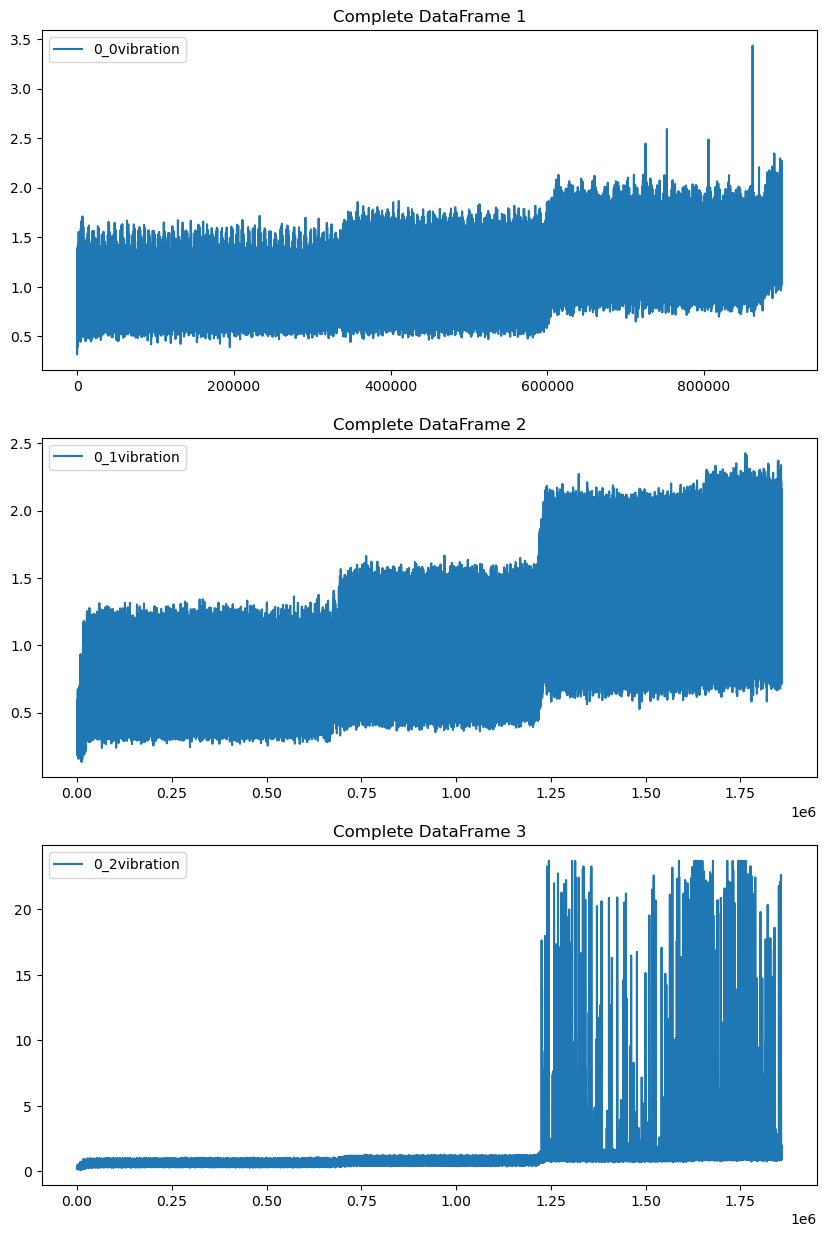

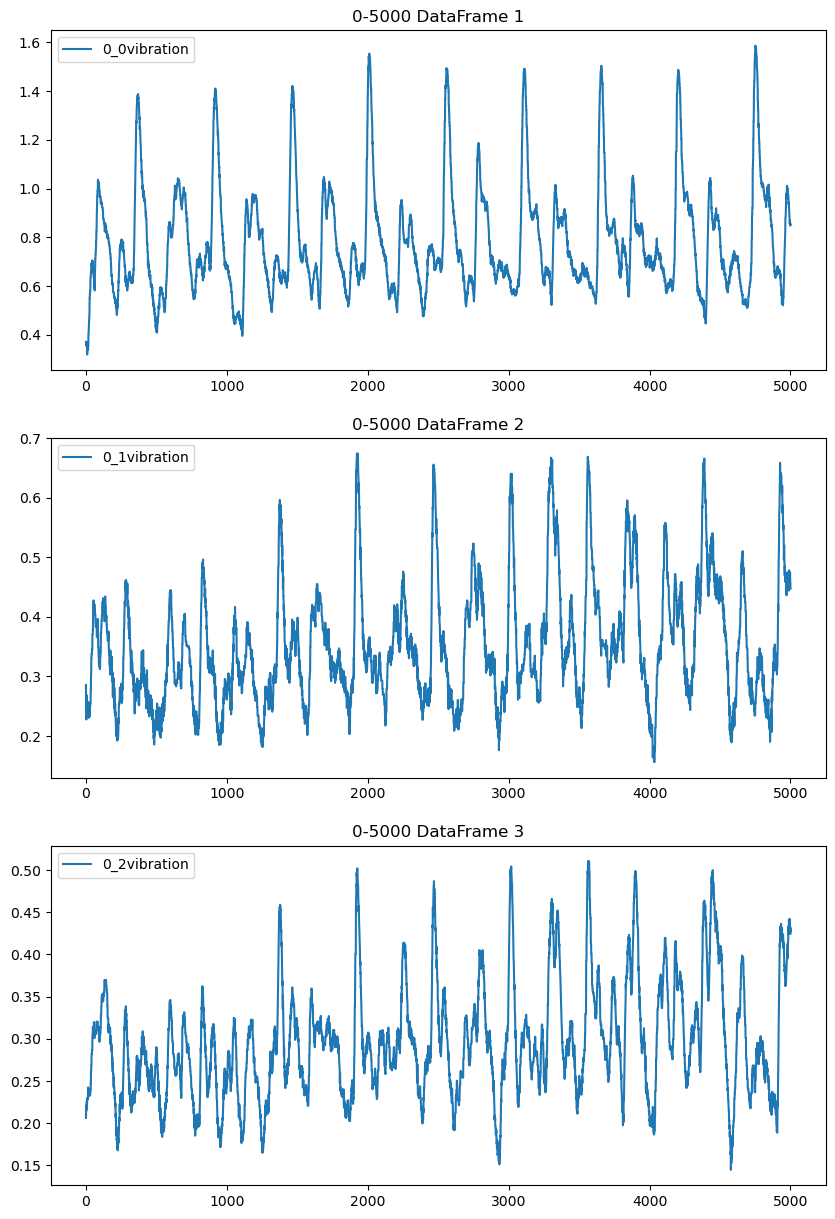

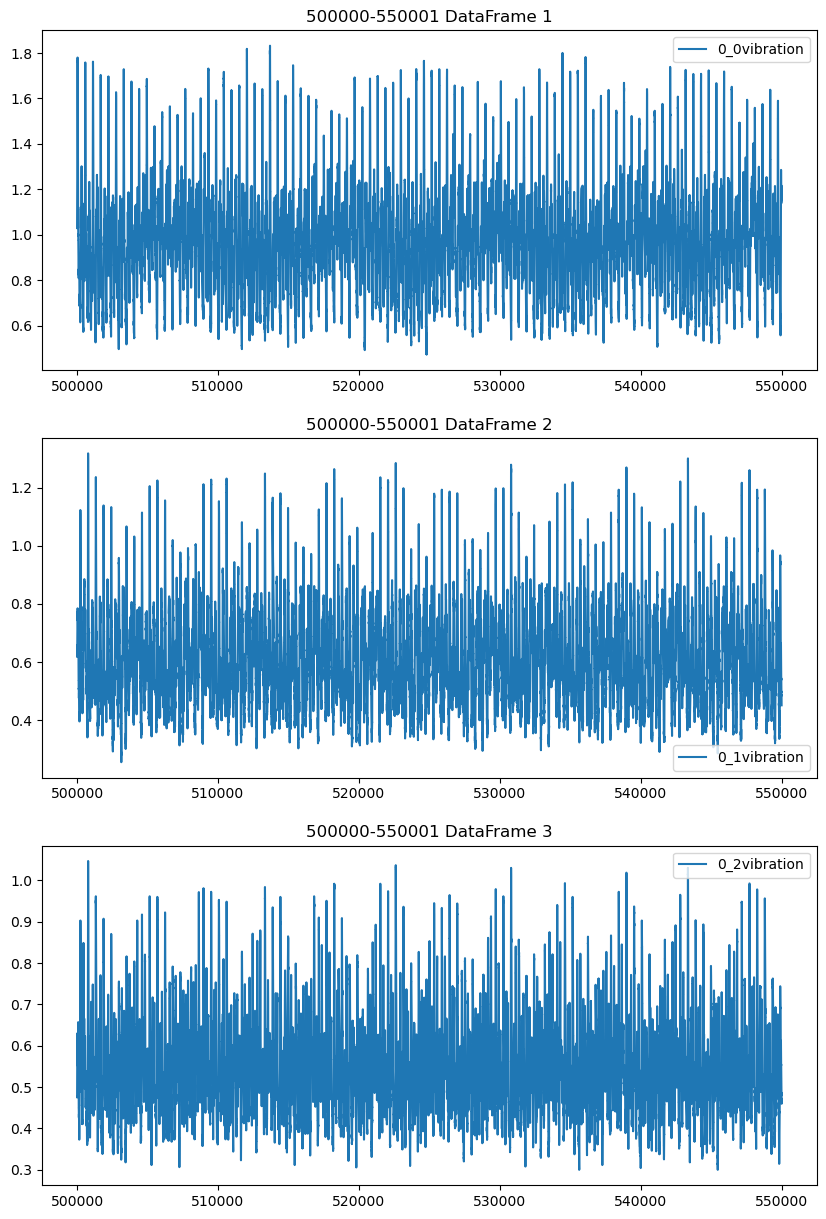

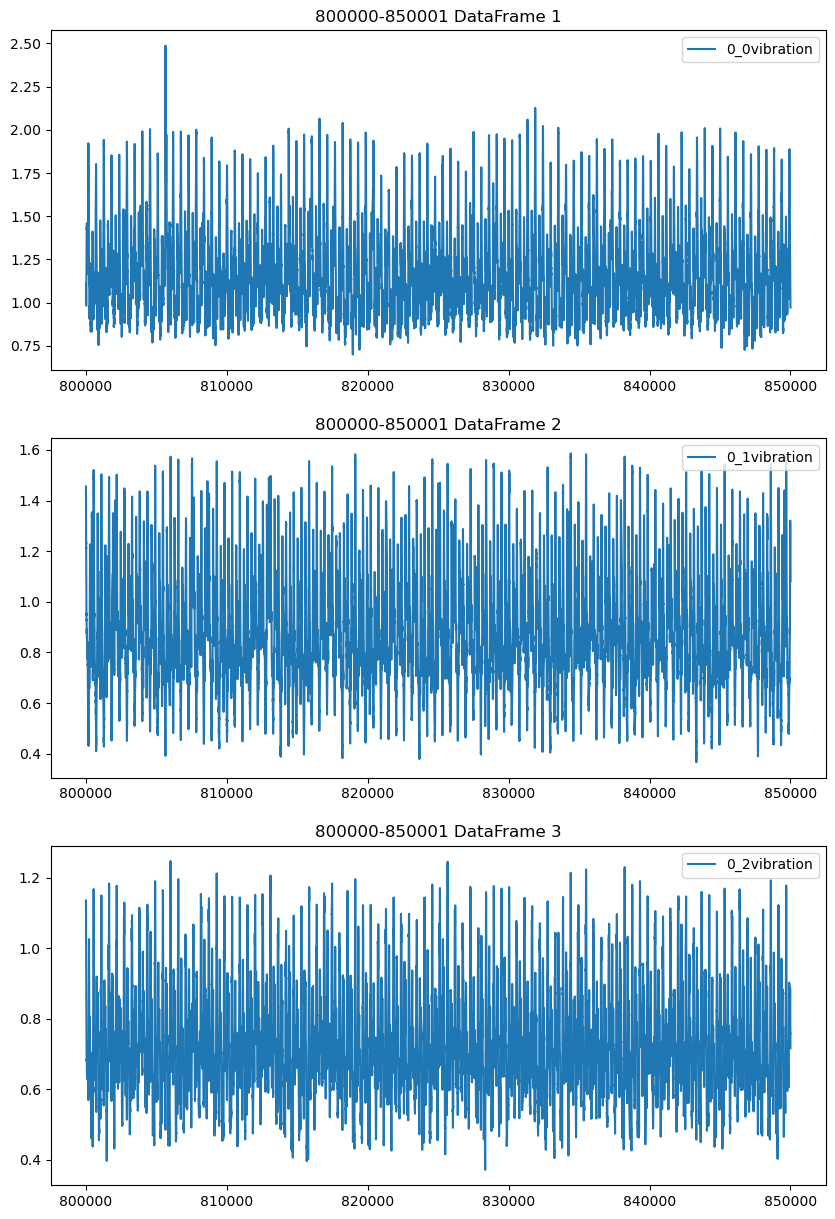

In [2]:
import os  
import pandas as pd  
import matplotlib.pyplot as plt
import numpy as np
  
    #step1:加载数据集
# 设置数据集的路径  
data_dir = '../DataFiles/ODS/vibration'   
# 创建空的列表来存储所有的DataFrame  
X_data0 = []  
y_data0 = []
# 遍历指定目录下的所有文件  
for filename in os.listdir(data_dir):  
    if filename.endswith('.csv'):  
        # 构建文件的完整路径  
        file_path = os.path.join(data_dir, filename)  
        # 读取Excel文件  
        df = pd.read_csv(file_path)
        serie=df.iloc[:, 0]
        version_without_extension = filename.rsplit(".", 1)[0] 
        serie.name=version_without_extension
        # 将读取的DataFrame添加到列表中  
        X_data0.append(serie)
        y_data0.append(version_without_extension)

    #step2:遍历X_data0中的每个DataFrame，并删除非数字数据  
cleaned_data = []  
for df in X_data0:  
    df_cleaned = df[pd.to_numeric(df, errors='coerce').notnull()]  
    cleaned_data.append(df_cleaned)  
 

    #step3:将X_data0中的每个DataFrame的所有元素变为float类型 
for i, df in enumerate(cleaned_data):  
    X_data0[i] = df.astype(float) 

    #step4:打印数据
print(f'X_data0的类型：{type(X_data0)};X_data0的子列的类型：{type(X_data0[0])};X_data0的第一列的长度：{X_data0[0].shape};')
print(f'y_data0的类型：{type(y_data0)};y_data0的长度：{len(y_data0)};')
# 创建一个图形和一组子图  
fig, axs = plt.subplots(len(X_data0), figsize=(10, 15))  # 根据DataFrame的数量创建子图  
  
# 遍历X_data0中的每个DataFrame  
for i, df in enumerate(X_data0): 
    # 绘制当前DataFrame的第一列（假设每个DataFrame都只有一列）  
    df.plot(ax=axs[i], title=f'Complete DataFrame {i+1}', label=y_data0[i])  
    axs[i].legend()  # 显示图例  
  
# 显示图形  
plt.show()


fig, axs = plt.subplots(len(X_data0), figsize=(10, 15))  # 根据DataFrame的数量创建子图  
  
# 遍历X_data0中的每个DataFrame  
for i, df in enumerate(X_data0): 
    df = df.iloc[:5001]
    # 绘制当前DataFrame的第一列（假设每个DataFrame都只有一列）  
    df.plot(ax=axs[i], title=f'0-5000 DataFrame {i+1}', label=y_data0[i])  
    axs[i].legend()  # 显示图例  
  
# 显示图形  
plt.show()


fig, axs = plt.subplots(len(X_data0), figsize=(10, 15))  # 根据DataFrame的数量创建子图  
  
# 遍历X_data0中的每个DataFrame  
for i, df in enumerate(X_data0): 
    df = df.iloc[500000:550001]
    # 绘制当前DataFrame的第一列（假设每个DataFrame都只有一列）  
    df.plot(ax=axs[i], title=f'500000-550001 DataFrame {i+1}', label=y_data0[i])  
    axs[i].legend()  # 显示图例  
  
# 显示图形  
plt.show()

fig, axs = plt.subplots(len(X_data0), figsize=(10, 15))  # 根据DataFrame的数量创建子图  
  
# 遍历X_data0中的每个DataFrame  
for i, df in enumerate(X_data0): 
    df = df.iloc[800000:850001]
    # 绘制当前DataFrame的第一列（假设每个DataFrame都只有一列）  
    df.plot(ax=axs[i], title=f'800000-850001 DataFrame {i+1}', label=y_data0[i])  
    axs[i].legend()  # 显示图例  
  
# 显示图形  
plt.show()

## 1_2. 将完整序列分解为小片段；(vibration)

### 1_2_1. 绘制数据长度对样本摘的影响的曲线图
- 根据曲线图确认样本片段的长度(由于样本熵基本在500后波动不大，即得到500的长度片段的复杂性是稳定的，512可作为分片长度)

。 90年代初提出的近似熵简记为的概念是从衡量时间序列复杂性的角度来度量信号，它依据的是序列中产生新模式的概率大小 ，如 果一个序列产生新模式的概率越大 ， 那么此序列的复杂性就越大 ，相应的近似熵的值就越大 。 近似熵可以用来描述振动
信号的复杂性和不规则性 ，通过比较不同运行期间内机械设备近似熵的变化情况 ，
可 以 反映该机械设备在此期间的运行状况 。样本摘简记为是近似熵的改进算法， 它 的优越性在于可以较少地依赖于时间序列长度 。

In [ ]:
import matplotlib.pyplot as plt  
def calculate_sample_entropy(data, m=2, r_factor=0.1):  
    """  
    计算给定时间序列的样本熵。  
      
    参数:  
    data (numpy.ndarray): 时间序列数据数组。  
    m (int): 嵌入维度。  
    r_factor (float): 相似容限，以标准差为单位。  
      
    返回:  
    float: 样本熵值。  
    """  
    # 将数据转换为numpy数组  
    data = np.array(data)  
    N = len(data)  
      
    # 计算标准差  
    std_dev = np.std(data)  
    r = r_factor * std_dev  # 将相似容限转换为实际数值  
      
    # 初始化计数器  
    C_m = np.zeros(N - m + 1)  
    C_m_plus_1 = np.zeros(N - m)  
      
    # 计算距离并计数  
    for i in range(N - m + 1):  
        for j in range(i + 1, N - m + 1):  
            if np.max(np.abs(data[i:i+m] - data[j:j+m])) <= r:  
                C_m[i] += 1  
                C_m[j] += 1  
      
    for i in range(N - m):  
        for j in range(i + 1, N - m):  
            if np.max(np.abs(data[i:i+m+1] - data[j:j+m+1])) <= r:  
                C_m_plus_1[i] += 1  
                C_m_plus_1[j] += 1  
      
    # 转换为概率  
    Phi_m = C_m / (N - m)  
    Phi_m_plus_1 = C_m_plus_1 / (N - m)  
      
    # 避免除以零  
    Phi_m = np.where(Phi_m == 0, np.finfo(float).eps, Phi_m)  
    Phi_m_plus_1 = np.where(Phi_m_plus_1 == 0, np.finfo(float).eps, Phi_m_plus_1)  
      
    # 计算样本熵  
    SampEn = -np.log(np.mean(Phi_m_plus_1) / np.mean(Phi_m))  
      
    return SampEn   
    
sample_entropies_vectors = []  
data_lengths_vectors = []  

for i in range(len(X_data0)):
    ts = X_data0[i]
    # 初始化列表来存储不同窗口长度的样本熵  
    sample_entropies = []  
    data_lengths = []   
    # 遍历窗口长度，从100开始，以100为间隔，直到1000  
    for data_length in range(100, 1001, 10):  
        # 从时间序列中提取第一个窗口  
        subsequence = ts[:data_length].values  
      
        # 计算窗口的样本熵
        simulated_samp_en =  calculate_sample_entropy(subsequence)
        # 将样本熵和对应的窗口长度添加到列表中  
        sample_entropies.append(simulated_samp_en)  
        data_lengths.append(data_length)
    sample_entropies_vectors.append(sample_entropies)  
    data_lengths_vectors.append(data_lengths) 


100:0.8763662020764604
110:0.8552022460623853
120:0.8266785731844636
130:0.8305470499623844
140:0.8510066829459024
150:0.7123886347818591
160:0.6775701044358962
170:0.6497293517853877
180:0.6539686294776688
190:0.6192001956080865
200:0.5881324639556326
210:0.6091694585420276
220:0.6354270798568195
230:0.6519458098489859
240:0.7305603031323697
250:0.7419576893261547
260:0.749028708187795
270:0.6858954409509921
280:0.6855484910316754
290:0.675551000820471
300:0.68725902124619
310:0.702328206634328
320:0.7142440767857157
330:0.7217284199837
340:0.7350622580887065
350:0.7420709075611911
360:0.7576554469766468
370:0.7812992027322471
380:0.7980029360933139
390:0.8026628255529655
400:0.8102145270649267
410:0.8188712091069598
420:0.9486163179676768
430:0.9644208132553899
440:0.9726767428357718
450:0.9762996575513555
460:0.981935757148384
470:0.9896409413805841
480:0.9940187219860626
490:1.0035000827431853
500:1.0046238802295866
510:1.0062364461310276
520:1.0093404307159277
530:1.00221320944964

In [ ]:
import os  
import pandas as pd  
import matplotlib.pyplot as plt

# 创建图表和坐标轴  
plt.figure(figsize=(10, 6))  
# 绘制每个数组  
for i, sample_entropies in enumerate(sample_entropies_vectors, 0):
    plt.plot(data_lengths_vectors[i], sample_entropies, label=f'Vector {i}')  
# 添加图例、标题和坐标轴标签  
plt.legend()  
plt.title('entropies')  
plt.xlabel('window_lengths')  
plt.ylabel('sample_entropies') 
# 显示图表  
plt.show()

### 1_2_2. 按重复度为50%，固定长度为512进行分解为小片段；(vibration)

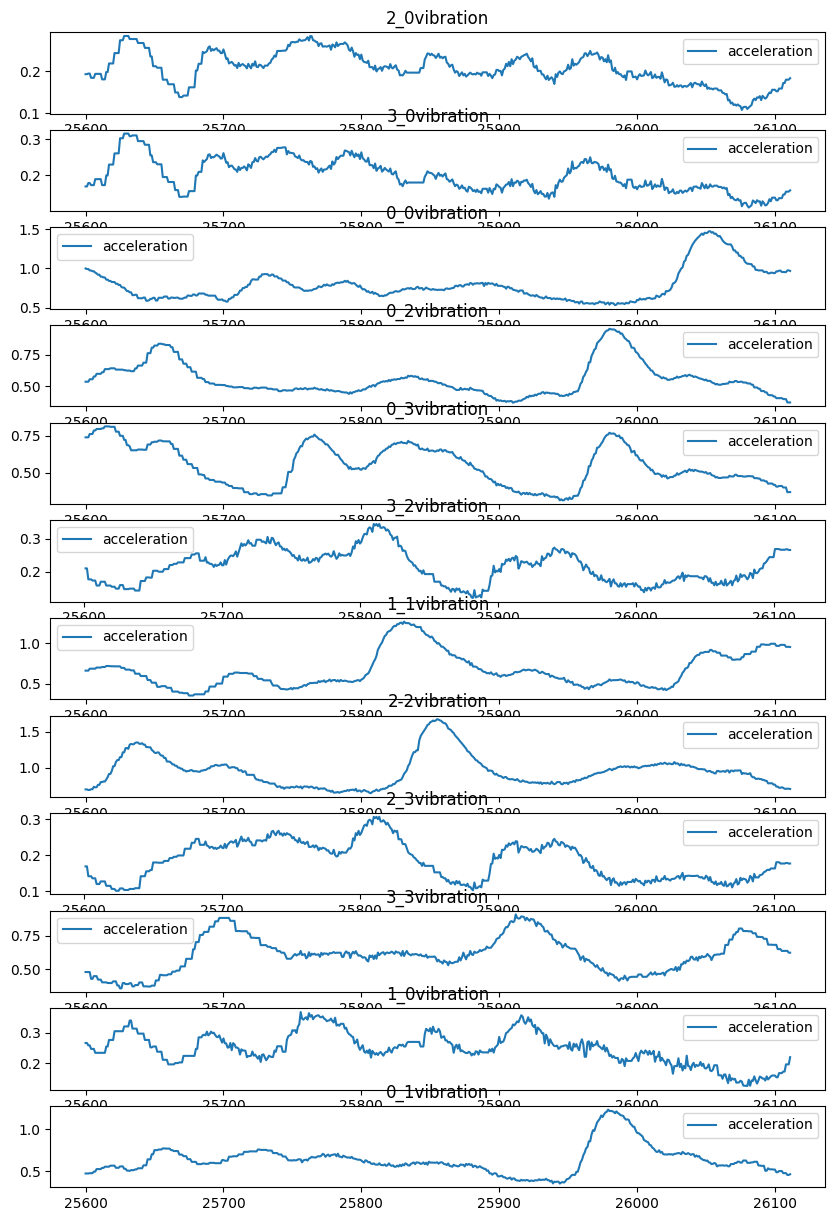

In [8]:
# 初始化X_data1来存储结果  
X_data1 = []  
  
# 遍历X_data0中的每个Series  
for series in X_data0:  
    # 计算步长（由于重叠率为50%，步长为序列长度的一半）  
    step_size = 256  # 因为256的一半是512，且我们想要50%的重叠  
    # 初始化一个空的list来存储子序列  
    subsequences = []  
    # 使用range和步长来生成子序列  
    for i in range(0, len(series) - 512 + 1, step_size):  
        # 确保切片是一维的，并转换为Series（虽然这里切片已经是Series）  
        subsequence = series.iloc[i:i+512]  
        subsequences.append(subsequence) 
    X_data1.append(subsequences)  

# 创建一个图形和一组子图  
fig, axs = plt.subplots(len(X_data1), figsize=(10, 15))  # 根据DataFrame的数量创建子图  
  
# 遍历X_data0中的每个DataFrame  
for i, df in enumerate(X_data1): 
    # 绘制当前DataFrame的第一列（假设每个DataFrame都只有一列）  
    df[100].plot(ax=axs[i], title=y_data0[i], label="acceleration")  
    axs[i].legend()  # 显示图例  
   
# 显示图形  
plt.show()

## 1_3. 提取有效特征；
- 统计量特征：有量纲的特征(均值mean、标准差std、最大值max、最小值min、中位数median、偏度skew、峰度kurt),无量纲的特征(峰值指标peak_factor,裕度指标clearance_factor,峭度指标kurtosis,脉冲指标impulse_factor)。
- 频域特征：快速傅里叶变换（FFT）获取频谱特征，如频率峰值、能量分布。
- 时域特征：过零率、自相关函数、互相关函数；(对于本数据而言效果不好)
- 时频特征：使用小波变换、希尔伯特-黄变换（HHT）转为为图像(计算量的大放弃)，使用EMD进行去高频噪音再重构；

注释：量纲，表存在不同物理量关系；有量纲特征值的数值大小常因负载，转速等条件的变化而变化， 给工程应用带来一定的困难。因此机械故障诊断中还釆用了多种无量纲指标；

### 1_3_1. 统计量特征(vibration)
- 由下图可知不同类别的数据片段的统计量特征是具有明显区分性的；

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 统计量特征：
# 初始化一个列表来存储每个 DataFrame 的均值,标准差向量  
mean_vectors = []  
std_vectors = []
max_vectors = []
min_vectors = []
median_vectors = []
skew_vectors = []
kurt_vectors = []
peak_factors_vectors=[]
clearance_factors_vectors=[]
kurtosiss_vectors=[]
impulse_factors_vectors=[]
# 遍历 X_data0 中的每个 list  
for list0 in X_data1:
    means=[]
    stds=[]
    maxs=[]
    mins=[]
    medians=[]
    skews=[]
    kurts=[]
    peak_factors=[]
    clearance_factors=[]
    kurtosiss=[]
    impulse_factors=[]
    for i in  range(len(list0)):
        data=list0[i]
        # 计算每列的离散特征，这将返回一个 Series，其中包含每列的离散特征
        mean = data.mean() 
        std = data.std()
        max0 = data.max()
        min0 = data.min()
        median = data.median()
        skew = data.skew()
        kurt = data.kurt()
        # 峰值指标（Peak Factor）  
        peak_value = np.max(data)  
        rms_value = np.sqrt(np.mean(data**2))  
        peak_factor = peak_value / rms_value  
  
        # 裕度指标（Clearance Factor）  
        # 这里我们定义为峰值与第二大绝对值的比值  
        second_largest_abs = np.sort(np.abs(data))[-2] if len(data) > 1 else 0  
        clearance_factor = peak_value / second_largest_abs  
  
        # 峭度指标（Kurtosis Factor）  
        # 注意：这里我们计算的是“样本峭度”，它通常与0进行比较（正态分布的峭度为0）  
        mean_value = np.mean(data)  
        std_dev = np.std(data)  
        kurtosis = np.sum((data - mean_value)**4) / (std_dev**4 * len(data)) - 3  
  
        # 脉冲指标（Impulse Factor）  
        mean_abs_value = np.mean(np.abs(data))  
        impulse_factor = peak_value / mean_abs_value 
        
        means.append(mean)
        stds.append(std)
        maxs.append(max0)
        mins.append(min0)
        medians.append(median)
        skews.append(skew)
        kurts.append(kurt)
        peak_factors.append(peak_factor)
        clearance_factors.append(clearance_factor)
        kurtosiss.append(kurtosis)
        impulse_factors.append(impulse_factor)
    # 将这个 lsit 转换为一个 NumPy 数组（或保持为 Series，取决于您的需求）  
    mean_vector = np.array(means)
    std_vector = np.array(stds)
    max_vector = np.array(maxs)
    min_vector = np.array(mins)
    median_vector = np.array(medians)
    skew_vector = np.array(skews)
    kurt_vector = np.array(kurts)
    peak_factors_vector=np.array(peak_factors)
    clearance_factors_vector=np.array(clearance_factors)
    kurtosiss_vector=np.array(kurtosiss)
    impulse_factors_vector=np.array(impulse_factors)
    # 将这个均值，标准差向量添加到列表中  
    mean_vectors.append(mean_vector)  
    std_vectors.append(std_vector)
    max_vectors.append(max_vector)
    min_vectors.append(min_vector)
    median_vectors.append(median_vector)
    skew_vectors.append(skew_vector)
    kurt_vectors.append(kurt_vector)
    peak_factors_vectors.append(peak_factors_vector)
    clearance_factors_vectors.append(clearance_factors_vector)
    kurtosiss_vectors.append(kurtosiss_vector)
    impulse_factors_vectors.append(impulse_factors_vector)
# 创建图表和坐标轴  
plt.figure(figsize=(10, 6))  
# 绘制每个数组  
for i, vector in enumerate(mean_vectors, 1):  
    plt.plot(vector, label=f'Vector {i}')  
# 添加图例、标题和坐标轴标签  
plt.legend()  
plt.title('Mean Vectors')  
plt.xlabel('Index')  
plt.ylabel('Value') 
# 显示图表  
plt.show()

# 创建图表和坐标轴  
plt.figure(figsize=(10, 6))  
# 绘制每个数组  
for i, vector in enumerate(std_vectors, 1):  
    plt.plot(vector, label=f'Vector {i}')  
# 添加图例、标题和坐标轴标签  
plt.legend()  
plt.title('Std Vectors')  
plt.xlabel('Index')  
plt.ylabel('Value') 
# 显示图表  
plt.show()

# 创建图表和坐标轴  
plt.figure(figsize=(10, 6))  
# 绘制每个数组  
for i, vector in enumerate(median_vectors, 1):  
    plt.plot(vector, label=f'Vector {i}')  
# 添加图例、标题和坐标轴标签  
plt.legend()  
plt.title('Median Vectors')  
plt.xlabel('Index')  
plt.ylabel('Value') 
# 显示图表  
plt.show()

# 创建图表和坐标轴  
plt.figure(figsize=(10, 6))  
# 绘制每个数组  
for i, vector in enumerate(max_vectors, 1):  
    plt.plot(vector, label=f'Vector {i}')  
# 添加图例、标题和坐标轴标签  
plt.legend()  
plt.title('Max Vectors')  
plt.xlabel('Index')  
plt.ylabel('Value') 
# 显示图表  
plt.show()


# 创建图表和坐标轴  
plt.figure(figsize=(10, 6))  
# 绘制每个数组  
for i, vector in enumerate(min_vectors, 1):  
    plt.plot(vector, label=f'Vector {i}')  
# 添加图例、标题和坐标轴标签  
plt.legend()  
plt.title('Min Vectors')  
plt.xlabel('Index')  
plt.ylabel('Value') 
# 显示图表  
plt.show()

# 创建图表和坐标轴  
plt.figure(figsize=(10, 6))  
# 绘制每个数组  
for i, vector in enumerate(skew_vectors, 1):  
    plt.plot(vector, label=f'Vector {i}')  
# 添加图例、标题和坐标轴标签  
plt.legend()  
plt.title('Skew Vectors')  
plt.xlabel('Index')  
plt.ylabel('Value') 
# 显示图表  
plt.show()

# 创建图表和坐标轴  
plt.figure(figsize=(10, 6))  
# 绘制每个数组  
for i, vector in enumerate(kurt_vectors, 1):  
    plt.plot(vector, label=f'Vector {i}')  
# 添加图例、标题和坐标轴标签  
plt.legend()  
plt.title('Kurt Vectors')  
plt.xlabel('Index')  
plt.ylabel('Value') 
# 显示图表  
plt.show()

# 创建图表和坐标轴  
plt.figure(figsize=(10, 6))  
# 绘制每个数组  
for i, vector in enumerate(peak_factors_vectors, 1):  
    plt.plot(vector, label=f'Vector {i}')  
# 添加图例、标题和坐标轴标签  
plt.legend()  
plt.title('Peak Factors Vectors')  
plt.xlabel('Index')  
plt.ylabel('Value') 
# 显示图表  
plt.show()

# 创建图表和坐标轴  
plt.figure(figsize=(10, 6))  
# 绘制每个数组  
for i, vector in enumerate(clearance_factors_vectors, 1):  
    plt.plot(vector, label=f'Vector {i}')  
# 添加图例、标题和坐标轴标签  
plt.legend()  
plt.title('Clearance Factors Vectors')  
plt.xlabel('Index')  
plt.ylabel('Value') 
# 显示图表  
plt.show()

# 创建图表和坐标轴  
plt.figure(figsize=(10, 6))  
# 绘制每个数组  
for i, vector in enumerate(kurtosiss_vectors, 1):  
    plt.plot(vector, label=f'Vector {i}')  
# 添加图例、标题和坐标轴标签  
plt.legend()  
plt.title('Kurtosiss Vectors')  
plt.xlabel('Index')  
plt.ylabel('Value') 
# 显示图表  
plt.show()

# 创建图表和坐标轴  
plt.figure(figsize=(10, 6))  
# 绘制每个数组  
for i, vector in enumerate(impulse_factors_vectors, 1):  
    plt.plot(vector, label=f'Vector {i}')  
# 添加图例、标题和坐标轴标签  
plt.legend()  
plt.title('Impulse Factors Vectors')  
plt.xlabel('Index')  
plt.ylabel('Value') 
# 显示图表  
plt.show()

### 1_3_2. 频域特征(vibration)
- 由不同类型各自的4个片段的频谱图得，主频大都是靠近0，幅值有部分区分性；
- 相同类型的主频幅值的有两到三个范围;
- 不同类型的主频幅值分布情况与统计量特征的均值分布基本相同；

In [ ]:
# 遍历 X_data0 中的每个 list  
fft_vectors = [] 
max_magnitudes_vectors = []
for i, list0 in enumerate(X_data1, 1):
    fft_magnitudes=[]
    max_magnitudes=[]
    for i in  range(len(list0)):
        # 将Series转换为numpy数组 
        arr = list0[i].values
        # 应用FFT  
        fft_result = np.fft.fft(arr)  
  
        # FFT结果是复数，你可以计算其幅度（magnitude）  
        fft_magnitude = np.abs(fft_result)  
        fft_magnitude_max=fft_magnitude.max()
        fft_magnitudes.append(fft_magnitude)
        max_magnitudes.append(fft_magnitude_max)
    fft_vectors.append(fft_magnitudes)
    max_magnitudes_vectors.append(max_magnitudes)
  
# 创建图表和坐标轴  
plt.figure(figsize=(10, 6))  
# 绘制每个数组  
for i, vector in enumerate(fft_vectors, 1):  
    plt.plot(vector[100], label=f'Vector {i};max:{vector[10].max()}')  
# 添加图例、标题和坐标轴标签  
plt.legend()  
plt.title('100 index')  
plt.xlabel('Frequency')  
plt.ylabel('Magnitude') 
# 显示图表  
plt.show()


# 创建图表和坐标轴  
plt.figure(figsize=(10, 6))  
# 绘制每个数组  
for i, vector in enumerate(fft_vectors, 1):  
    plt.plot(vector[1000], label=f'Vector {i};max:{vector[100].max()}')  
# 添加图例、标题和坐标轴标签  
plt.legend()  
plt.title('1000 index')  
plt.xlabel('Frequency')  
plt.ylabel('Magnitude') 
# 显示图表  
plt.show()

# 创建图表和坐标轴  
plt.figure(figsize=(10, 6))  
# 绘制每个数组  
for i, vector in enumerate(fft_vectors, 1):  
    plt.plot(vector[2000], label=f'Vector {i};max:{vector[1000].max()}')  
# 添加图例、标题和坐标轴标签  
plt.legend()  
plt.title('2000 index')  
plt.xlabel('Frequency')  
plt.ylabel('Magnitude') 
# 显示图表  
plt.show()

# 创建图表和坐标轴  
plt.figure(figsize=(10, 6))  
# 绘制每个数组  
for i, vector in enumerate(fft_vectors, 1): 
    plt.plot(vector[3000], label=f'Vector {i};max:{vector[3000].max()}')  
# 添加图例、标题和坐标轴标签  
plt.legend()  
plt.title('3000 index')  
plt.xlabel('Frequency')  
plt.ylabel('Magnitude') 
# 显示图表  
plt.show()

# 创建图表和坐标轴  
plt.figure(figsize=(10, 6))  
# 绘制每个数组  
for i, vector in enumerate(max_magnitudes_vectors, 1):  
    plt.plot(vector, label=f'Vector {i}')  
# 添加图例、标题和坐标轴标签  
plt.legend()  
plt.title('Max Magnitudes')  
plt.xlabel('Magnitude')  
plt.ylabel('index') 
# 显示图表  
plt.show()

### 1_3_3. 时域特征(vibration)
- 由于vibration显示的都是正加速度无过零率，不算；
- 不计算互相关性函数；
- 自相关性函数由可知具有区别性；

In [ ]:
# 遍历 X_data0 中的每个 list  
autocorr_vectors =[]
for i, list0 in enumerate(X_data1, 1):
    autocorr_vector = []
    for i in  range(len(list0)): 
        s = list0[i]
        # 计算自相关函数  
        autocorr = np.correlate(s, s, mode='full')  
        # 自相关函数是对称的，我们通常只关心它的一半（或根据需要调整）  
        autocorr = autocorr[autocorr.size // 2:]  
  
        # 归一化自相关（使其最大值为1）
        autocorr = autocorr / autocorr[0] 
        autocorr_vector.append(autocorr)
    autocorr_vectors.append(autocorr_vector)

# 创建图表和坐标轴  
plt.figure(figsize=(10, 6))  
# 绘制每个数组  
for i, vector in enumerate(autocorr_vectors, 1):  
    plt.plot(vector[100], label=f'Vector {i}')  
# 添加图例、标题和坐标轴标签  
plt.legend()  
plt.title(' 100 index')  
plt.xlabel('Autocorr')  
plt.ylabel('Time') 
# 显示图表  
plt.show()

# 创建图表和坐标轴  
plt.figure(figsize=(10, 6))  
# 绘制每个数组  
for i, vector in enumerate(autocorr_vectors, 1):  
    plt.plot(vector[1000], label=f'Vector {i}')  
# 添加图例、标题和坐标轴标签  
plt.legend()  
plt.title(' 1000 index')  
plt.xlabel('Autocorr')  
plt.ylabel('Time') 
# 显示图表  
plt.show()

# 创建图表和坐标轴  
plt.figure(figsize=(10, 6))  
# 绘制每个数组  
for i, vector in enumerate(autocorr_vectors, 1):  
    plt.plot(vector[2000], label=f'Vector {i}')  
# 添加图例、标题和坐标轴标签  
plt.legend()  
plt.title(' 2000 index')  
plt.xlabel('Autocorr')  
plt.ylabel('Time') 
# 显示图表  
plt.show()


# 创建图表和坐标轴  
plt.figure(figsize=(10, 6))  
# 绘制每个数组  
for i, vector in enumerate(autocorr_vectors, 1):  
    plt.plot(vector[3000], label=f'Vector {i}')  
# 添加图例、标题和坐标轴标签  
plt.legend()  
plt.title(' 3000 index')  
plt.xlabel('Autocorr')  
plt.ylabel('Time') 
# 显示图表  
plt.show()

### 1_3_4. 时频特征(vibration)
- 使用EMD分解后去高频噪音数据(K小于0.1的IMF)后再重构；
- 综合评价指标K为方差贡献率和相关性的组合运算结果，表IMF与原始信号的相关性和贡献度；

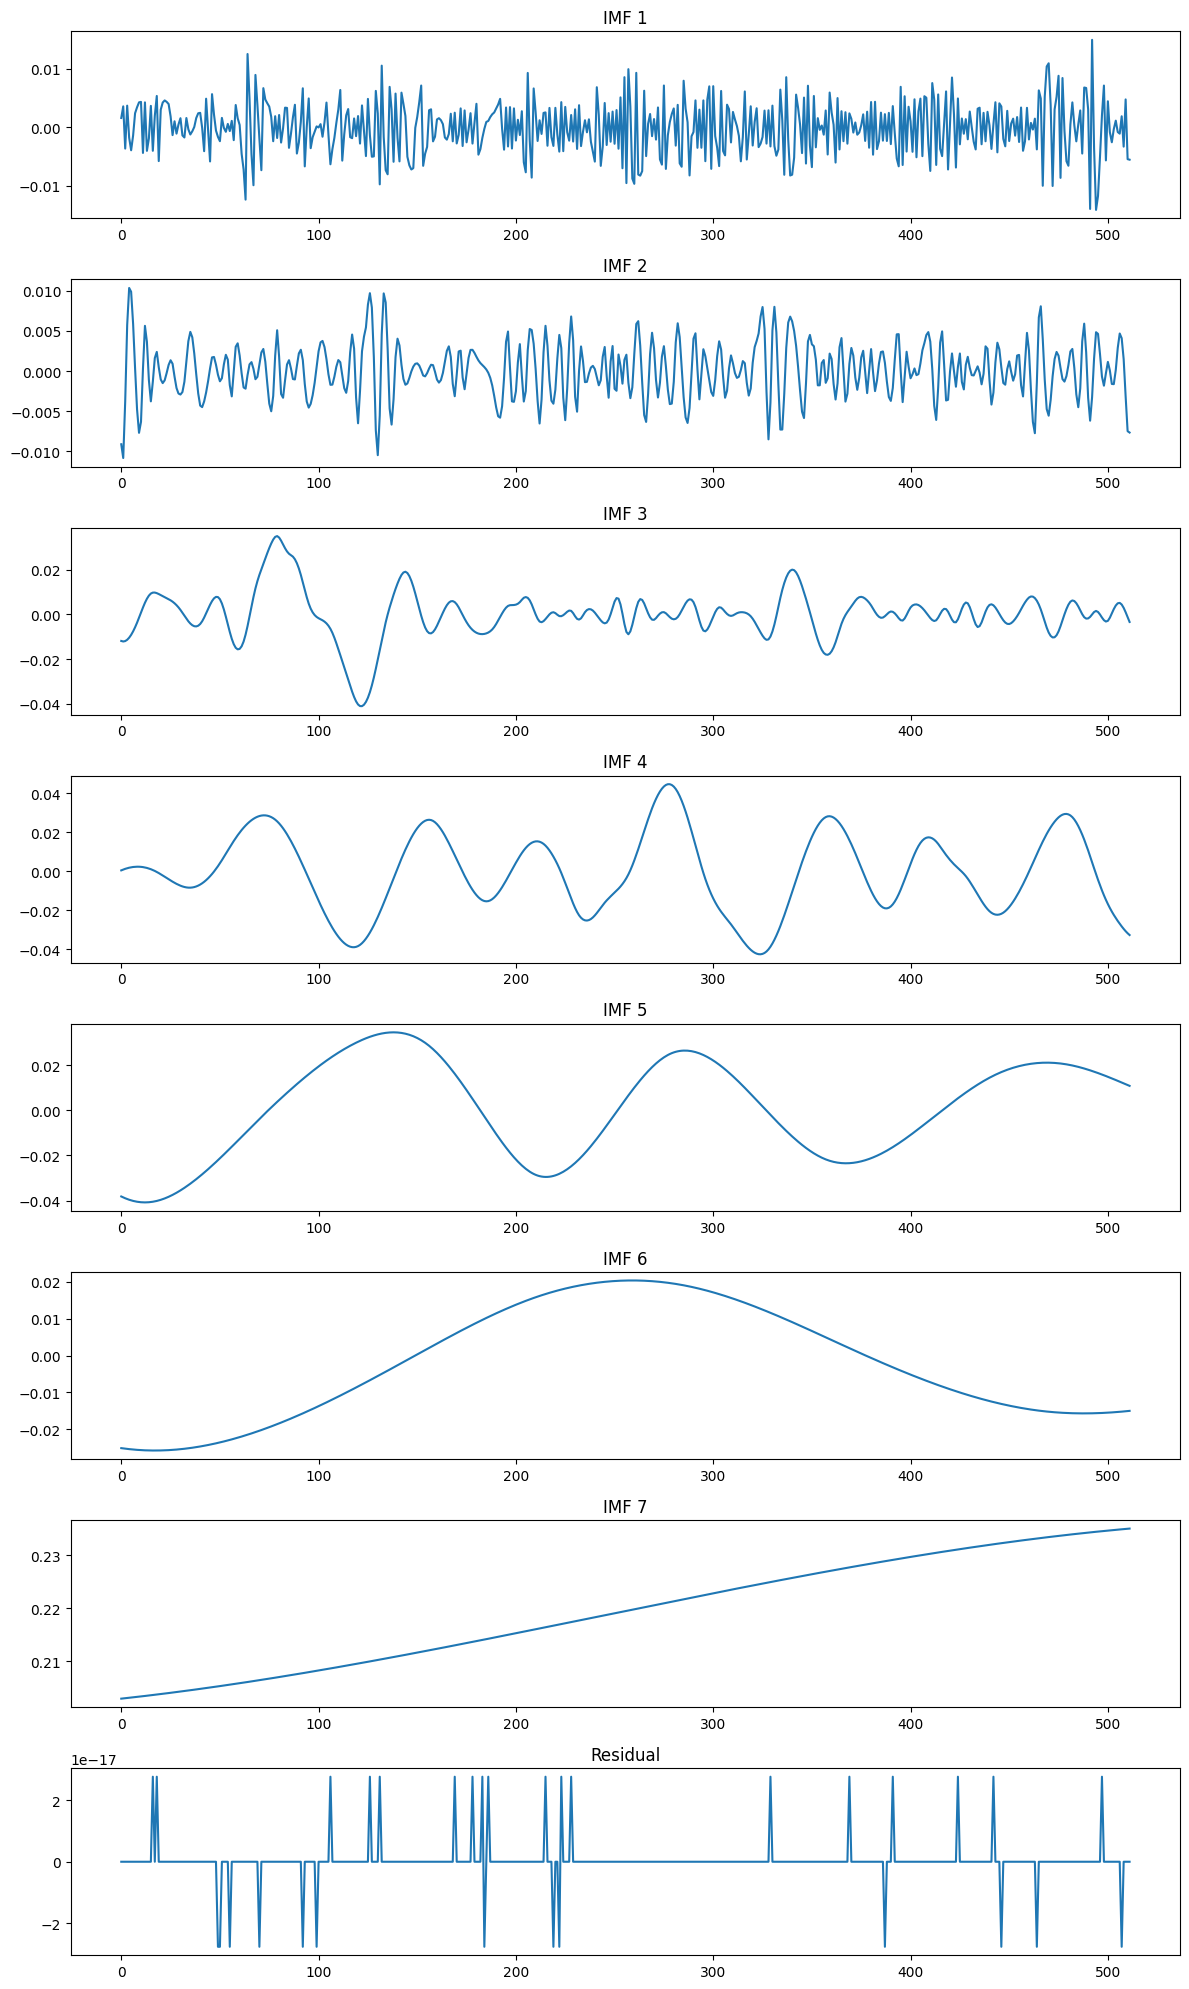

In [9]:
import subprocess  
# 使用subprocess.run()执行shell命令  
result = subprocess.run(['pip', 'install','EMD-signal'], capture_output=True, text=True)
import pandas as pd  
import numpy as np  
from PyEMD import EMD  #pip install EMD-signal
import matplotlib.pyplot as plt 
X_EMD_test=X_data1[1][0].values
emd = EMD()
IMFs = emd.emd(X_EMD_test)  
# 计算残差（原始信号减去所有IMF之和）  
residual = X_EMD_test - np.sum(IMFs, axis=0)  
# 绘制所有IMF和残差  
plt.figure(figsize=(12, 20))  
for n, imf in enumerate(IMFs):  
    plt.subplot(len(IMFs) + 1, 1, n + 1)  
    plt.plot(imf)  
    plt.title(f'IMF {n+1}')  
plt.subplot(len(IMFs) + 1, 1, len(IMFs) + 1)  
plt.plot(residual)  
plt.title('Residual')  
plt.tight_layout()  
plt.show() 

In [10]:
# 计算相关性和方差贡献率  
x=X_EMD_test
N = len(x)  
rho_xy = []  
mesb = []  
for y_i in IMFs:  
    # 计算均值  
    x_mean, y_mean = np.mean(x), np.mean(y_i)  
    # 计算相关性  
    cov_xy = np.sum((x - x_mean) * (y_i - y_mean))  
    var_x, var_y = np.sum((x - x_mean)**2), np.sum((y_i - y_mean)**2)  
    rho_xy_i = cov_xy / (np.sqrt(var_x) * np.sqrt(var_y))  
    rho_xy.append(rho_xy_i)  
      
    # 计算方差贡献率  
    d_i_squared = np.sum((y_i - y_mean)**2) / N  
    total_variance = sum(np.sum((imf - np.mean(imf))**2) / N for imf in IMFs)  
    mesb_i = d_i_squared / total_variance  
    mesb.append(mesb_i)  
  
# 计算综合评价指标 K  
alpha, beta = 0.2, 0.8  
K = [alpha * rho + beta * mesb for rho, mesb in zip(rho_xy, mesb)]
print("Correlation:", rho_xy)  
print("Variance Explanation:", mesb)  
print("Combined K:", K)

Correlation: [0.06689220431018415, 0.0700228362215812, 0.3389564000738456, 0.5621585214394466, 0.5947057692942811, 0.45230123525603516, 0.44311057232083423]
Variance Explanation: [0.014629435945885881, 0.008128454380762866, 0.08659329621948726, 0.30190405247575913, 0.34315629070906095, 0.1705745573881573, 0.07501391288088663]
Combined K: [0.025081989618745536, 0.020507330748926536, 0.13706591699035894, 0.35395494626849666, 0.393466186426105, 0.22691989296173287, 0.14863324476887615]


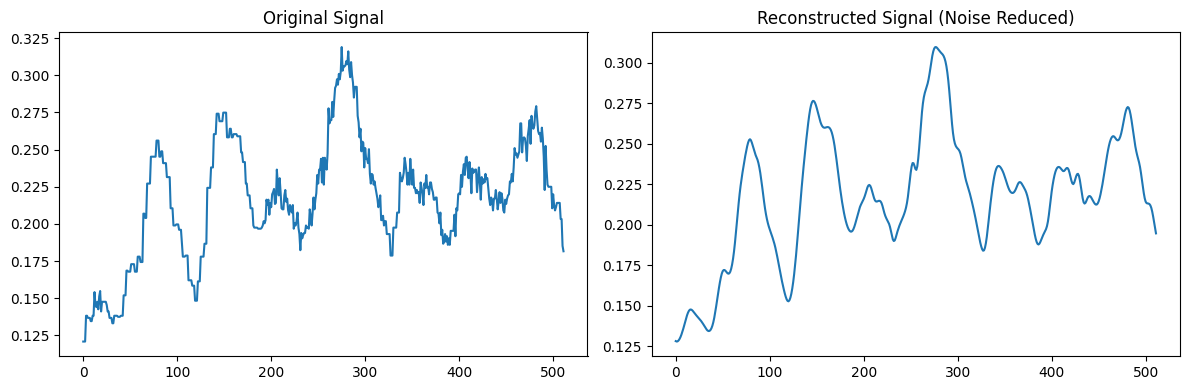

In [11]:
noise_imfs=[]
non_noise_imfs=[]
# 区分噪音和非噪音
for i in range(len(K)):
    if K[i]< 0.1:
        noise_imfs.append(IMFs[i])
    else:
        non_noise_imfs.append(IMFs[i])
# 重构信号  
reconstructed_signal = np.sum(non_noise_imfs, axis=0) + residual
  
# 绘制原始信号和重构信号  
plt.figure(figsize=(12, 4))  
plt.subplot(1, 2, 1)  
plt.plot(X_EMD_test)  
plt.title('Original Signal')  
  
plt.subplot(1, 2, 2)  
plt.plot(reconstructed_signal)  
plt.title('Reconstructed Signal (Noise Reduced)')  
plt.tight_layout()  
plt.show()